In [3]:
# Bu  bölümde kullanılacak olan datasetde calışanların deneyim ve maaşları yer almaktadır. ; ile ayrılan datayı split edicez.
# csv to dataframe 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("linear_regression_dataset.csv" , sep = ";") # deafult olarak  , ile ayırır . Biz ; istedik.

In [13]:
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


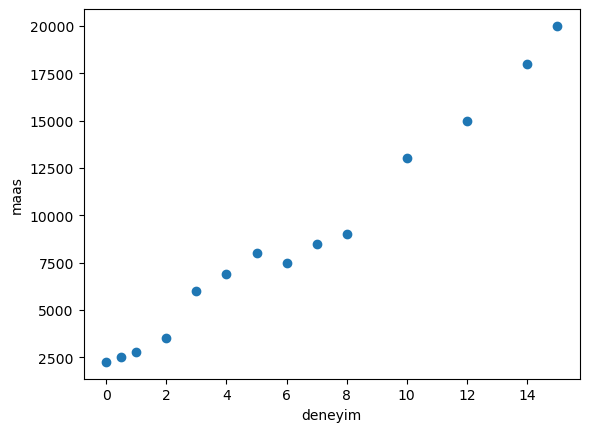

In [21]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")
plt.show()

* 9 yıllık bir deneyime sahip bir insanın maaşı ne kadar hesaplamak isteyebilirim. Datasetteki deperlere cizgi atmak lazım.Line fit ya da linear regression denir.
* y = bo+b1*x   bo: constant ( bias)  b1 = coeff  b1 = a/b(Eğim)
* maas = bo + b1 * deneyim
* 12500 = 2500 + 1000*10
* deneyim 11 ise maaş ?   ----> maas = 2500 + 1000*11 = 13500 Bu matematiksel modeli kullanarak bir tahmin yaptık.
* Line noktalara en yakın yerden geçmeli .
![resim](1.jpg)
* residual = y-y_head ---> y değerini tahmin ile bulucaz bo+b1*x ' e göre
* Çizginin altında da y değerleri olacağından dolayı + - den 0 olur. Bu - leri + a çevirip toplam hatayı bulmak lazım
* sum(residual^2)/n ---> bu şekilde karesini  alınca   errorları kaybetmeyiz. Toplam hata değerini buluruz. Bu da bize line çizgimizi ne kadar güzel çizdiğimizi gösterir.
* n:sample sayısı
* MSE : mean squared error ---> line'ı fit etmek için kullanılan yöntemdir.
* ![resim](2.jpg)
* MSE değeri en küçük line'ı bulmaya çalışacağız. Amaç = min(MSE)

In [34]:
# Sklearn :  Bu kütüphane içinde machine learning algoritmaları vardır.

# library
from sklearn.linear_model import LinearRegression
# linear regression model
linear_reg = LinearRegression()
x = df.deneyim
y = df.maas


In [40]:
type(x) # sklearn de pandas kullanılır ancak bunlar genelde numpy'a çevrilir.

pandas.core.series.Series

In [42]:
type(y)

pandas.core.series.Series

In [50]:
x = df.deneyim.values # . values ile numpy arraye çevirdik.
y = df.maas.values

In [52]:
x

array([ 0.5,  0. ,  1. ,  5. ,  8. ,  4. , 15. ,  7. ,  3. ,  2. , 12. ,
       10. , 14. ,  6. ])

In [54]:
y

array([ 2500,  2250,  2750,  8000,  9000,  6900, 20000,  8500,  6000,
        3500, 15000, 13000, 18000,  7500], dtype=int64)

In [60]:
x.shape # 14 e 1 lik ama sklearn şu şekilde görmek ister ---> (14,1)

(14,)

In [62]:
y.shape

(14,)

In [66]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)
print(x.shape)
print(y.shape)

(14, 1)
(14, 1)


In [68]:
# Yukardaki şekildeki mavi noktaları ayırdık şimdi line'ı fit edelim.

In [70]:
linear_reg.fit(x,y)

LinearRegression()

In [72]:
linear_reg

LinearRegression()

In [86]:
b0 = linear_reg.predict([[0]])  # y= b0+b1*x idi x=0 için y =b0 olacak
print("bo:", b0)

bo: [[1663.89519747]]


In [88]:
b0 = linear_reg.intercept_  # b0'ı bulmanın diğer bir yolu da bu
print("bo:", b0)       # y eksenini kestiği nokta intercept

bo: [1663.89519747]


In [96]:
b1 = linear_reg.coef_
print("b1", b1)  # eğim slope

b1 [[1138.34819698]]


In [98]:
# maas = 1663 + 1138 * deneyim -----> predict function

In [104]:
maas_yeni = 1663 + 1138*11  # tahmin 1. yol
maas_yeni

14181

In [110]:
linear_reg.predict([[11]]) # 2.yol


array([[14185.72536421]])

In [134]:
#visualize line
import numpy as np
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  #---->  (16,) --- (16,1)

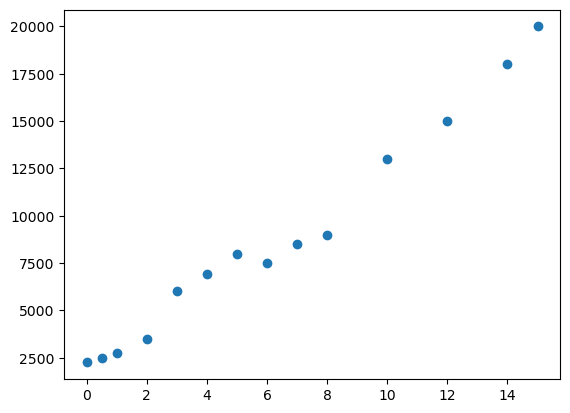

In [136]:
plt.scatter(x,y)
plt.show()

In [138]:
y_head = linear_reg.predict(array) # maas
y_head

array([[ 1663.89519747],
       [ 2802.24339445],
       [ 3940.59159143],
       [ 5078.9397884 ],
       [ 6217.28798538],
       [ 7355.63618235],
       [ 8493.98437933],
       [ 9632.3325763 ],
       [10770.68077328],
       [11909.02897025],
       [13047.37716723],
       [14185.72536421],
       [15324.07356118],
       [16462.42175816],
       [17600.76995513],
       [18739.11815211]])

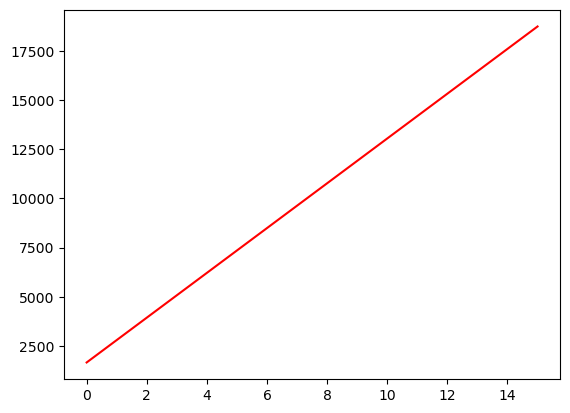

In [147]:
plt.plot(array,y_head,color="red")

In [142]:
# Çizgilen çizgi bu şekildeymiş.

In [151]:
linear_reg.predict([[100]])

array([[115498.71489503]])

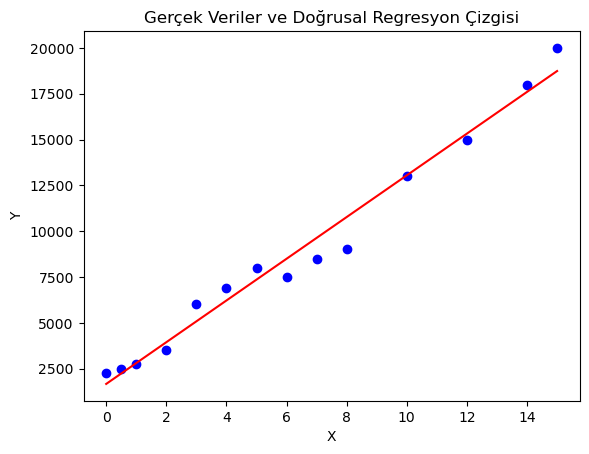

In [153]:
plt.scatter(x, y, color="blue")         # Noktalar
plt.plot(array, y_head, color="red")    # Kırmızı çizgi
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gerçek Veriler ve Doğrusal Regresyon Çizgisi")
plt.show()
